In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
import imblearn
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
fx = pd.read_csv("/content/drive/MyDrive/Curriculars/IDA Project/train_x.csv", index_col=0)
fy = pd.read_csv("/content/drive/MyDrive/Curriculars/IDA Project/train_y.csv")
fx_test = pd.read_csv("/content/drive/MyDrive/Curriculars/IDA Project/test_x.csv", index_col = 0)
print(len(fx))
for feature in fx.columns:
    print("feature:", feature, "\t\t\t NaNs: ", sum(fx[feature].isna()))
print("target labels: ","Label", "\t\t\t NaNs:",sum(fy['Label'].isna()))


80000
feature: Expense 			 NaNs:  2044
feature: Income 			 NaNs:  1955
feature: Loan type 			 NaNs:  2011
feature: Occupation type 			 NaNs:  1859
feature: Age 			 NaNs:  2014
feature: Score1 			 NaNs:  1940
feature: Score2 			 NaNs:  2036
feature: Score3 			 NaNs:  1955
feature: Score4 			 NaNs:  1972
feature: Score5 			 NaNs:  1998
target labels:  Label 			 NaNs: 3903


In [53]:
#Age Feature
id = fx['Age'][np.isnan(fx['Age'])].index
id1 = fx['Age'][np.isnan(fx['Age'])][(fy.loc[np.array(id)] == 0)['Label']].index 
fx['Age'].loc[id1] = fx['Age'][np.isnan(fx['Age'])][(fy.loc[np.array(id)] == 0)['Label']].replace(np.nan, 0)

id2 = fx['Age'][np.isnan(fx['Age'])][(fy.loc[np.array(id)] == 1)['Label']].index 
fx['Age'].loc[id2] = fx['Age'][np.isnan(fx['Age'])][(fy.loc[np.array(id)] == 1)['Label']].replace(np.nan, 1)

#Loan Type Feature
id =  fx['Loan type'][pd.isnull(fx['Loan type'])].index

id1 = fx['Loan type'][pd.isnull(fx['Loan type'])][(fy.loc[np.array(id)] == 0)['Label']].index 
fx['Loan type'].loc[id1] = fx['Loan type'][pd.isnull(fx['Loan type'])][(fy.loc[np.array(id)] == 0)['Label']].replace(np.nan, 'A')

id2 = fx['Loan type'][pd.isnull(fx['Loan type'])][(fy.loc[np.array(id)] == 1)['Label']].index 
fx['Loan type'].loc[id2] = fx['Loan type'][pd.isnull(fx['Loan type'])][(fy.loc[np.array(id)] == 1)['Label']].replace(np.nan, 'B')

#Occupation Type Feature
id =  fx['Occupation type'][pd.isnull(fx['Occupation type'])].index
fx['Occupation type'].loc[id] =  fx['Occupation type'].loc[id].replace(np.nan,'Y')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [54]:
# Iterative imputer
imp = IterativeImputer(missing_values = np.nan, max_iter = 10, random_state = 42,verbose=1)

# One Hot Encoding of categorical features Loan Type and Occupation Type
fx_loan_type = pd.get_dummies(fx['Loan type'], prefix = 'Loan type')
fx_occupation = pd.get_dummies(fx['Occupation type'], prefix = 'Occupation type')

fx_test_loan_type = pd.get_dummies(fx_test['Loan type'], prefix = 'Loan type')
fx_test_occupation = pd.get_dummies(fx_test['Occupation type'], prefix = 'Occupation type')

cols = list(fx.columns);
cols.remove('Loan type'); cols.remove('Occupation type');

fx = pd.concat([fx[cols], fx_loan_type, fx_occupation],axis = 1)
fx_test = pd.concat([fx_test[cols], fx_test_loan_type, fx_test_occupation],axis = 1)
imp.fit(fx);imp.fit(fx_test);
p = list(imp.transform(fx))
p_test = list(imp.transform(fx_test))
y = list(fy['Label'])

[IterativeImputer] Completing matrix with shape (80000, 13)
[IterativeImputer] Change: 4074.5145393183066, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 4076.075356546575, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 710.7802105846931, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 853.1404184259509, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 272.8975530247353, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 35.31887618964538, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 56.755107540519475, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 14.199123163707554, scaled tolerance: 20.72891533 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (20000, 13)
[IterativeImputer] Change: 0.0, scaled tolerance: 21.25023229 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (80000, 13)
[IterativeImputer] Completing ma

In [55]:
for feature in fx.columns:
    print("feature:", feature, "\t\t\t NaNs: ", sum(fx[feature].isna()))
print("target labels: ","Label", "\t\t\t NaNs:",sum(fy['Label'].isna()))

feature: Expense 			 NaNs:  2044
feature: Income 			 NaNs:  1955
feature: Age 			 NaNs:  103
feature: Score1 			 NaNs:  1940
feature: Score2 			 NaNs:  2036
feature: Score3 			 NaNs:  1955
feature: Score4 			 NaNs:  1972
feature: Score5 			 NaNs:  1998
feature: Loan type_A 			 NaNs:  0
feature: Loan type_B 			 NaNs:  0
feature: Occupation type_X 			 NaNs:  0
feature: Occupation type_Y 			 NaNs:  0
feature: Occupation type_Z 			 NaNs:  0
target labels:  Label 			 NaNs: 3903


In [56]:
# KNN imputer
imp = KNNImputer(missing_values = np.nan)

imp.fit(fx)
p = list(imp.transform(fx))
p_test = list(imp.transform(fx_test))
y = list(fy['Label'])

x_matrix = []
x_test_matrix = []
y_matrix = []
for i in range(len(p)):
    if fy['Label'][i] in [0,1]:
        x_matrix.append(p[i])
        y_matrix.append(y[i])
for j in range(len(p_test)):
    x_test_matrix.append(p_test[j])


df_x = pd.DataFrame(x_matrix, columns = fx.columns)
df_y = pd.DataFrame(y_matrix, columns = fy.columns[1:])
df_x_test = pd.DataFrame(x_test_matrix, columns = fx_test.columns)
fxy = pd.concat([df_x, df_y], axis = 1)
df_y.head()

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [57]:
fx_test.head()

,Expense,Income,Age,Score1,Score2,Score3,Score4,Score5,Loan type_A,Loan type_B,Occupation type_X,Occupation type_Y,Occupation type_Z
ID_Test,,,,,,,,,,,,,
1,1780.356350,16691.51975,1,0.348808,226.896383,12.506668,607.396052,3440.172169,0,1,1,0,0
2,1939.547945,14782.20015,0,0.426270,125.046903,12.976712,599.808710,3517.084962,1,0,0,0,1
3,1721.876977,14035.40923,0,0.097577,181.636946,5.501962,596.344664,3411.918090,0,1,0,0,1
4,1681.268538,15179.79116,0,0.295460,151.320572,3.058352,597.761361,3392.298282,1,0,0,0,1
5,1654.495928,15187.09603,0,0.272479,178.429450,4.571414,600.006307,3379.363201,1,0,0,1,0


## Understanding the data

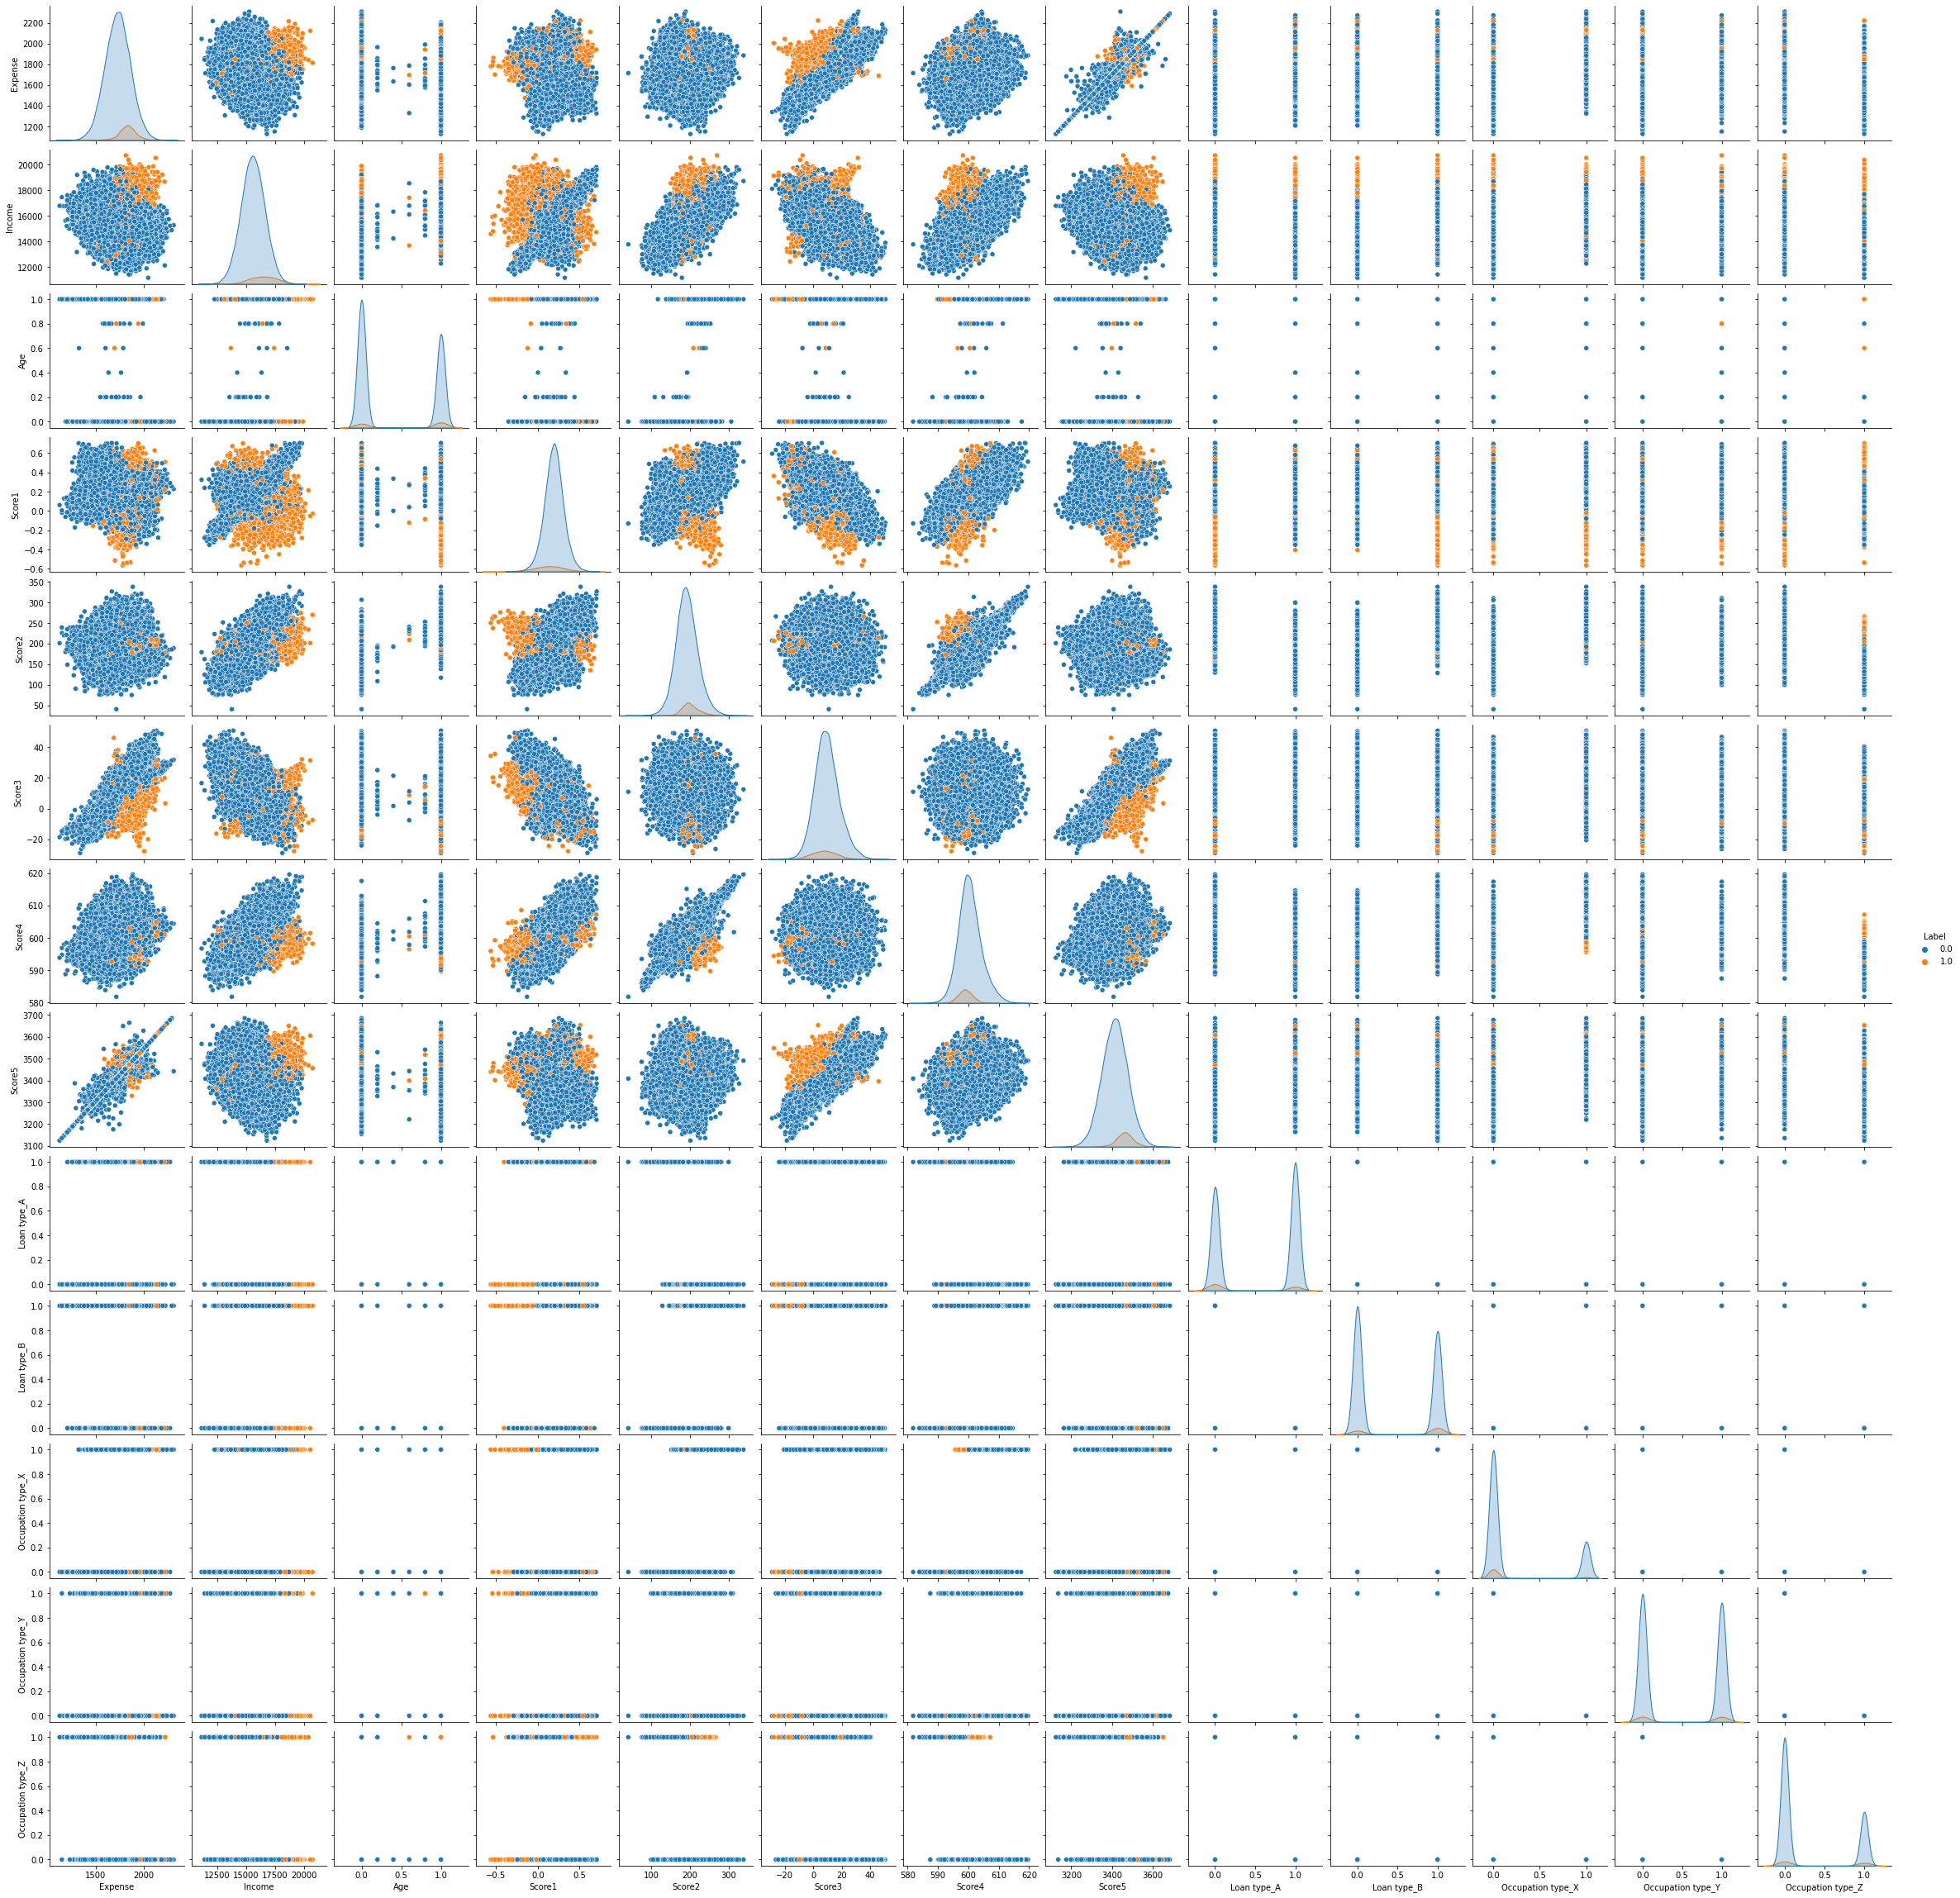

In [12]:
sns.pairplot(fxy, hue = 'Label')

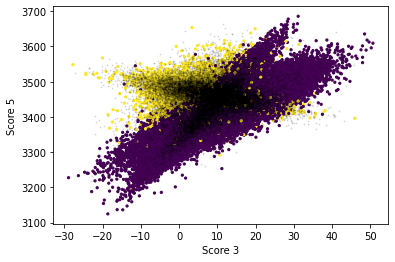

In [58]:
plt.scatter(df_x['Score3'], df_x['Score5'], c = df_y['Label'], s = 5)
plt.scatter(df_x_test['Score3'], df_x_test['Score5'], c = 'black', s = 1, alpha = 0.1)

plt.xlabel('Score 3')
plt.ylabel("Score 5")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, 'Standardized distribution of Expense $\\cdot$ Income')

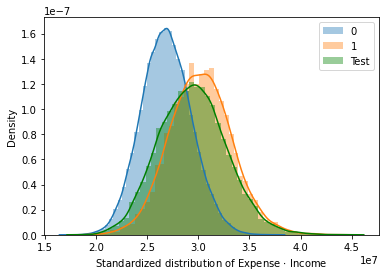

In [59]:

sns.distplot((df_x['Expense'] * df_x['Income'])[df_y['Label'] == 0.0], label  = '0')
sns.distplot((df_x['Expense'] * df_x['Income'])[df_y['Label'] == 1.0], label = '1')
sns.distplot((df_x_test['Expense']*df_x_test['Income']),color = 'green', label = 'Test')
plt.legend(loc = 'best')
plt.xlabel('Standardized distribution of Expense $\cdot$ Income')


In [60]:
# Generating Additional Features
fxy = pd.concat([df_x, df_y], axis = 1)
df_x['ExpInc'] = df_x['Expense']*df_x['Income']
df_x['Score1^2'] = df_x['Score1']*df_x['Score1']
df_x['Score2^2'] = df_x['Score2']*df_x['Score2']
df_x['Score3^2'] = df_x['Score3']*df_x['Score3']
df_x['Score4^2'] = df_x['Score4']*df_x['Score4']
df_x['Score5^2'] = df_x['Score5']*df_x['Score5']
df_x_test['ExpInc'] = df_x_test['Expense']*df_x_test['Income']
df_x_test['Score1^2'] = df_x_test['Score1']*df_x_test['Score1']
df_x_test['Score2^2'] = df_x_test['Score2']*df_x_test['Score2']
df_x_test['Score3^2'] = df_x_test['Score3']*df_x_test['Score3']
df_x_test['Score4^2'] = df_x_test['Score4']*df_x_test['Score4']
df_x_test['Score5^2'] = df_x_test['Score5']*df_x_test['Score5']
#sns.pairplot(fxy[['Expense','ExpInc','Income','Age','Score1', 'Score2', 'Score3', 'Score4', 'Score5','Label']], hue = 'Label')

## Logistic Regression with L1 norm

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

### Preprocessing

In [62]:
means = {feature: np.mean(df_x[feature]) for feature in df_x.columns}
std = {feature: np.std(df_x[feature]) for feature in df_x.columns}
for feature in df_x.columns:
    print("Feature:", feature,"\t\t Average: ", np.mean(df_x[feature]), "\t\t Std: ", np.std(df_x[feature]))
    print("Feature:", feature,"\t\t min: ", min(df_x[feature]), "\t\t max: ", max(df_x[feature]))

Feature: Expense 		 Average:  1734.1686620789148 		 Std:  132.5986101308242
Feature: Expense 		 min:  1126.809192 		 max:  2309.129903
Feature: Income 		 Average:  15641.112382529464 		 Std:  1058.7768779969583
Feature: Income 		 min:  11171.70324 		 max:  20728.91533
Feature: Age 		 Average:  0.4321011340788729 		 Std:  0.49527596528978657
Feature: Age 		 min:  0.0 		 max:  1.0
Feature: Score1 		 Average:  0.18763790320491638 		 Std:  0.12258015930043138
Feature: Score1 		 min:  -0.563328188 		 max:  0.705736652
Feature: Score2 		 Average:  192.06846618327143 		 Std:  28.346436804083048
Feature: Score2 		 min:  40.5727969 		 max:  338.07355079999996
Feature: Score3 		 Average:  9.362084015411778 		 Std:  8.718078886755153
Feature: Score3 		 min:  -28.8852352 		 max:  50.69147917
Feature: Score4 		 Average:  600.3937974307345 		 Std:  3.8030486495254157
Feature: Score4 		 min:  581.8064038 		 max:  619.6231075000001
Feature: Score5 		 Average:  3417.663031684265 		 Std:  63.92261745577

In [63]:
for feature in ['Expense', 'Income','ExpInc', 'Score1^2', 'Score2^2', 'Score3^2', 'Score4^2', 'Score5^2','Score1', 'Score2', 'Score3', 'Score4', 'Score5']:
    df_x_test[feature] = (df_x_test[feature] -np.mean(df_x[feature]))/(np.std(df_x[feature]))
    df_x[feature] = (df_x[feature] -np.mean(df_x[feature]))/(np.std(df_x[feature]))
"""df_x['ExpInc'] = df_x['Expense']*df_x['Income']
df_x['Score1^2'] = df_x['Score1']**2
df_x['Score2^2'] = df_x['Score2']**2
df_x['Score3^2'] = df_x['Score3']**2
df_x['Score4^2'] = df_x['Score4']**2
df_x['Score5^2'] = df_x['Score5']**2"""
df_x_test.head()

,Expense,Income,Age,Score1,Score2,Score3,Score4,Score5,Loan type_A,Loan type_B,Occupation type_X,Occupation type_Y,Occupation type_Z,ExpInc,Score1^2,Score2^2,Score3^2,Score4^2,Score5^2
0,0.348327,0.992095,1.0,1.314815,1.228652,0.360697,1.841222,0.352131,0.0,1.0,1.0,0.0,0.0,0.998710,1.417073,1.240458,-0.033003,1.846269,0.344079
1,1.548880,-0.811231,0.0,1.946746,-2.364373,0.414613,-0.153847,1.555348,1.0,0.0,0.0,0.0,1.0,0.598418,2.608115,-1.984376,0.021623,-0.156725,1.569260
2,-0.092698,-1.516564,0.0,-0.734708,-0.368001,-0.442772,-1.064707,-0.089873,0.0,1.0,0.0,0.0,1.0,-1.124922,-0.807645,-0.423003,-0.608279,-1.062832,-0.099190
3,-0.398949,-0.435711,0.0,0.879601,-1.437496,-0.723064,-0.692191,-0.396804,1.0,0.0,0.0,0.0,1.0,-0.606774,0.735235,-1.331120,-0.703674,-0.692894,-0.404849
4,-0.600856,-0.428812,0.0,0.692125,-0.481155,-0.549510,-0.101889,-0.599159,1.0,0.0,0.0,1.0,0.0,-0.757664,0.476319,-0.526905,-0.651027,-0.104880,-0.605401


In [66]:
X_train, X_val, y_train, y_val = train_test_split(df_x[['Expense', 'ExpInc','Income', 'Score1', 'Score2', 'Score3', 'Score4', 'Score5']], df_y, random_state = 42, test_size = 0.2)
# X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, random_state = 23, test_size = 0.2)

### Training

In [67]:
#one hot encoding
model = LogisticRegression(penalty = "l1",C = 2, solver = "liblinear") # C is obtained after hyperparameter optimization
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_score = model.fit(X_train, y_train).decision_function(X_val)
print()
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred), "\t F1Score: ", f1_score(y_train, y_train_pred))
print("val Accuracy: ", accuracy_score(y_val, y_val_pred), "\t F1Score: ", f1_score(y_val, y_val_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training Accuracy:  0.9596727828243836 	 F1Score:  0.6109966724766281
val Accuracy:  0.9598554533508541 	 F1Score:  0.5907568653717347


In [68]:
import statsmodels.api as sm
logit_model = sm.Logit(df_y, sm.add_constant(df_x[['Expense','Income', 'Score1', 'Score2', 'Score3', 'Score4', 'Score5']])).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.133312
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Label   No. Observations:                76097
Model:                          Logit   Df Residuals:                    76089
Method:                           MLE   Df Model:                            7
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.4526
Time:                        05:19:52   Log-Likelihood:                -10145.
converged:                       True   LL-Null:                       -18532.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2156      0.033   -126.383      0.000      -4.281      -4.150
Expense        1.6492      0.131     12.578      0.000       1.392       1.906
Income         0.7981      0.023     34.343      0.000       0.753       0.844
Score1        -0.7718      0.069    -11.179      0.000      -0.907      -0.636
Score2         1.0379      0.067     15.388      0.000       0.906       1.170
Score3        -2.0666      0.074    -28.053      0.000      -2.211      -1.922
Score4        -1.2606      0.104    -12.104      0.000      -1.465      -1.056
Score5         1.0524      0.130      8.106      0.000       0.798       1.307
==============================================================================
"""

Expense -5.636298189704548
ExpInc 9.018376363601986
Income -5.793356173231064
Score1 -0.8835165096520764
Score2 0.9503918563915734
Score3 -2.1912335353640846
Score4 -1.0668896152415568
Score5 1.0304911273274537


Text(0.5, 0, 'Features')

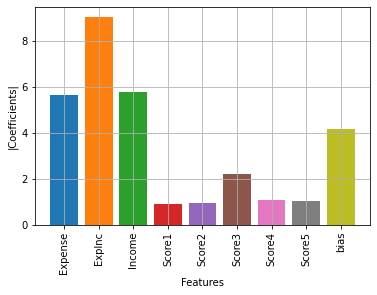

In [69]:
plt.grid()
for i in range(len(model.coef_[0])):
    print(X_train.columns[i], model.coef_[0][i])
    plt.bar(i, abs(model.coef_[0][i]))
plt.bar(len(model.coef_[0]), abs(model.intercept_))
p = list(X_train.columns)
p.append('bias')
plt.xticks(range(len(model.coef_[0])+1),p, rotation = 90)
plt.ylabel("|Coefficients|")

plt.xlabel("Features")

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.911


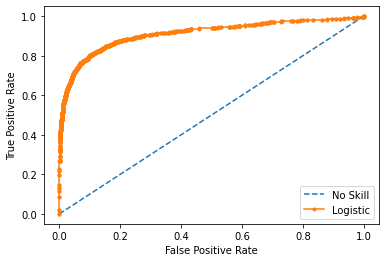

In [70]:
ns_probs = [0 for _ in range(len(y_val))]
lr_probs = model.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val['Label'], ns_probs)
lr_auc = roc_auc_score(y_val['Label'], lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val['Label'], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val['Label'], lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.591 auc=0.681


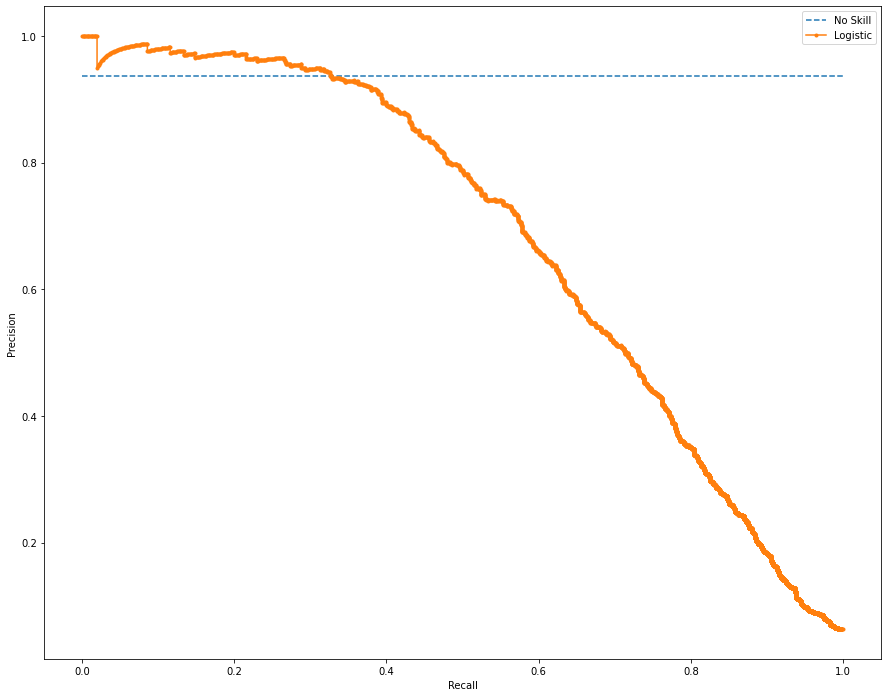

In [71]:
lr_probs = model.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_val)
lr_precision, lr_recall, _ = precision_recall_curve(y_val, lr_probs)
lr_f1, lr_auc = f1_score(y_val, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val['Label']==0]) / len(y_val)
plt.figure(figsize = (15,12))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Logistic Regression with Age, Occupation type and Loan type

In [35]:
X_train, X_val, y_train, y_val = train_test_split(df_x[['Age', 'Loan type_A', 'Loan type_B', 'Occupation type_X', 'Occupation type_Y', 'Occupation type_Z']], df_y, random_state = 42, test_size = 0.2)

In [36]:
model = LogisticRegression(penalty = "l1", solver = "liblinear")
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_score = model.fit(X_train, y_train).decision_function(X_val)
print(y_val_pred)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred), "\t F1Score: ", f1_score(y_train, y_train_pred))
print("val Accuracy: ", accuracy_score(y_val, y_val_pred), "\t F1Score: ", f1_score(y_val, y_val_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0. 0. 0. ... 0. 0. 0.]
Training Accuracy:  0.9332260131083989 	 F1Score:  0.0
val Accuracy:  0.9363994743758213 	 F1Score:  0.0


In [37]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], ": ",  model.coef_[:,i][0])

Age :  0.8050988009630293
Loan type_A :  -0.6300941282820215
Loan type_B :  0.0
Occupation type_X :  -1.8051198348770527
Occupation type_Y :  -0.4270638994354834
Occupation type_Z :  0.2374412985087213


# Plotting UMAPs

In [39]:
import umap
reducer = umap.UMAP()

In [40]:
reducer.fit(df_x[['Score1','Score2', 'Score3', 'Score4','Score5','Expense','Income','Age','Loan type_A', 'Loan type_B', 'Occupation type_X','Occupation type_Y', 'Occupation type_Z']])

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [41]:
embeddings = reducer.transform(df_x[['Score1','Score2', 'Score3', 'Score4','Score5','Expense','Income','Age','Loan type_A', 'Loan type_B', 'Occupation type_X','Occupation type_Y', 'Occupation type_Z']])
embed2 = reducer.transform(df_x_test[['Score1','Score2', 'Score3', 'Score4','Score5','Expense','Income','Age','Loan type_A', 'Loan type_B', 'Occupation type_X','Occupation type_Y', 'Occupation type_Z']])

In [42]:
y_pred = pd.read_csv("/content/drive/MyDrive/Curriculars/IDA Project/pred_y.csv")
y_pred.head()

,# Labels
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


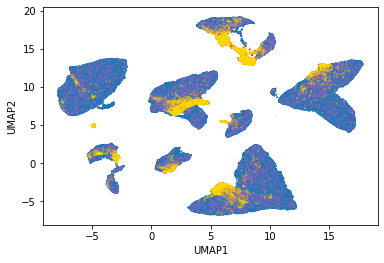

In [44]:
l1 = {0:'tab:blue', 1:'tab:red'}
l2 = {0:'tab:purple', 1: 'gold'}
plt.scatter(embeddings[:,0], embeddings[:,1], c = [l1[i] for i in df_y['Label']],s = 1.0)
plt.scatter(embed2[:,0], embed2[:,1], alpha = 0.3, s= 1, c = [l2[i] for i in y_pred['# Labels']])
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()